In [ ]:
import pandas as pd
import sys


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [116]:
mydata_txt = pd.read_csv(r'/content/drive/My Drive/DM/data/need_eda.txt',sep = '\t',
                         encoding = 'utf-8', header=None, index_col=None)
mydata_txt

,0,1
0,1,deed reason earthquak may allah forgiv
1,1,forest fire near rong sask canada
2,1,resid ask shelter place notifi offic evacu she...
3,1,peopl receiv wildfir evacu order california
4,1,got sent photo rubi alaska smoke wildfir pour ...
...,...,...
6822,1,break refugio oil spill may costlier bigger pr...
6823,1,siren went forney tornado warn
6824,1,offici say quarantin place alabama home possib...
6825,1,flip side walmart bomb everyon evacu stay tune...


In [117]:
from sklearn.model_selection import train_test_split

train,val = train_test_split(mydata_txt, test_size = 0.2, random_state = 42, stratify = mydata_txt[0])
train[1]

2470               ignit knock deton sensor senso fit bmw
4476    like youtub video itsjustinstuart gun rang mayhem
2829    link watch show better work might electrocut s...
5915                                    remembr hiroshima
1304                               took way longer expect
                              ...                        
4556    studi wider varieti therapi could help vet tro...
3504    iaffloc live lost except first respond public ...
2034    mani half nake men twitter tonight normal embr...
2957                   air group rescu emerg servic learn
6281                  sarahmcp justjon give titti twister
Name: 1, Length: 5461, dtype: object

In [118]:
# importing libraries
import tensorflow as tf
from tensorflow.keras.layers import (Embedding,
                                     LSTM,
                                     Dense,
                                     Dropout,
                                     GlobalMaxPool1D,
                                     BatchNormalization)
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot

In [119]:
VOC_SIZE = 30000
onehot_repr_train = [one_hot(words, VOC_SIZE) for words in train[1]]
onehot_repr_val = [one_hot(words, VOC_SIZE) for words in val[1]]
print(onehot_repr_train[3000])
SENT_LENGTH = 15
embedded_docs_train = pad_sequences(onehot_repr_train, padding="post", maxlen=SENT_LENGTH)
embedded_docs_val = pad_sequences(onehot_repr_val, padding="post", maxlen=SENT_LENGTH)

[3133, 20200, 8529, 6717, 28109, 20408]


In [152]:
def create_model():
  VECT_FEATURES = 32
  model = Sequential()
  model.add(Embedding(VOC_SIZE,
                      VECT_FEATURES,
                      input_length=SENT_LENGTH))
  model.add(LSTM(100, return_sequences = True))
  model.add(GlobalMaxPool1D())
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(10, activation="relu"))
  model.add(Dropout(0.2))
  model.add(Dense(1, activation = "sigmoid"))
  return model

In [153]:
model = create_model()
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"]) # compiling
model.summary() #summary

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 15, 32)            960000    
_________________________________________________________________
lstm_14 (LSTM)               (None, 15, 100)           53200     
_________________________________________________________________
global_max_pooling1d_14 (Glo (None, 100)               0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 100)               400       
_________________________________________________________________
dropout_28 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 10)                1010      
_________________________________________________________________
dropout_29 (Dropout)         (None, 10)              

In [154]:
history = model.fit(embedded_docs_train, train[0], validation_data=
                    (embedded_docs_val, val[0]),epochs=3, batch_size=32)

Epoch 1/3
171/171 [==============================] - 8s 33ms/step - loss: 0.6359 - accuracy: 0.6196 - val_loss: 0.6407 - val_accuracy: 0.6032
Epoch 2/3
171/171 [==============================] - 5s 30ms/step - loss: 0.3775 - accuracy: 0.8523 - val_loss: 0.5470 - val_accuracy: 0.7467
Epoch 3/3
171/171 [==============================] - 5s 30ms/step - loss: 0.2183 - accuracy: 0.9253 - val_loss: 0.5107 - val_accuracy: 0.7665


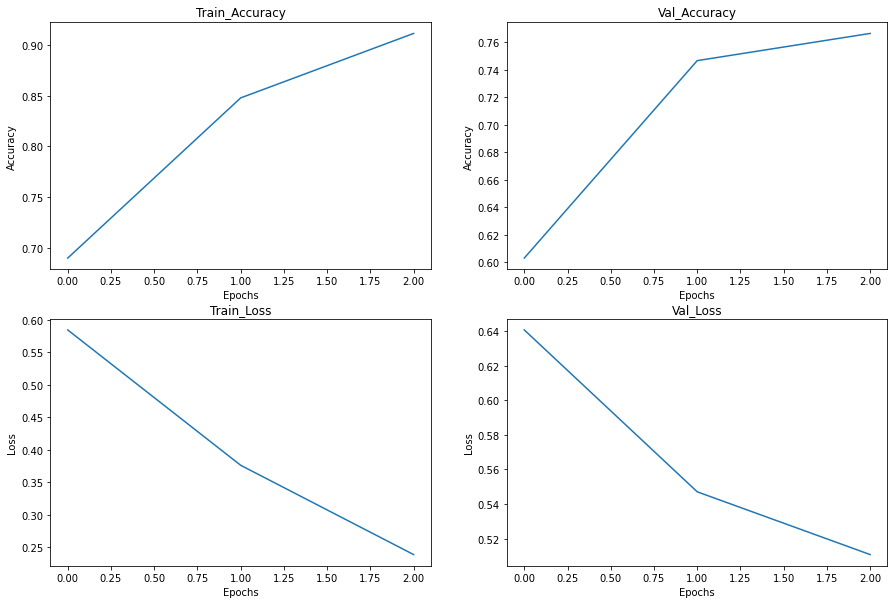

<Figure size 432x288 with 0 Axes>

In [155]:
import matplotlib.pyplot as plt
fig,(ax1,ax2) = plt.subplots(2,2,figsize=(15,10))
ax1[0].plot(history.history["accuracy"])
ax1[0].set_title("Train_Accuracy")
ax1[0].set_xlabel("Epochs")
ax1[0].set_ylabel("Accuracy")

ax1[1].plot(history.history["val_accuracy"])
ax1[1].set_title("Val_Accuracy")
ax1[1].set_xlabel("Epochs")
ax1[1].set_ylabel("Accuracy")

ax2[0].plot(history.history["loss"])
ax2[0].set_title("Train_Loss")
ax2[0].set_xlabel("Epochs")
ax2[0].set_ylabel("Loss")

ax2[1].plot(history.history["val_loss"])
ax2[1].set_title("Val_Loss")
ax2[1].set_xlabel("Epochs")
ax2[1].set_ylabel("Loss")
plt.show()
plt.savefig('LSTM_Train.png')

In [156]:
import numpy as np

data_test = pd.read_csv(r'/content/drive/My Drive/DM/data/processed_test.txt',sep = ',',
                         encoding = 'utf-8', header=None)

data_answer = pd.read_csv(r'/content/drive/My Drive/DM/data/answer.csv',sep = ',',
                         encoding = 'utf-8', header=None, index_col=0)

VOC_SIZE = 30000

print(data_test[2])
test = np.array(data_test[2],dtype = str)
onehot_repr = [one_hot(words, VOC_SIZE) for words in test]

SENT_LENGTH = 15
embedded_docs = pad_sequences(onehot_repr, padding="post", maxlen=SENT_LENGTH)
embedded_docs

pred = model.predict(embedded_docs)
data_answer = np.array(data_answer[1][1:],dtype=int)


0                                happen terribl car crash
1           heard earthquak differ citi stay safe everyon
2       forest fire spot pond gees flee across street ...
3                          apocalyps light spokan wildfir
4                      typhoon soudelor kill china taiwan
                              ...                        
3258        earthquak safeti los angel safeti fasten xrwn
3259    storm wors last hurrican cityand other hardest...
3260                            green line derail chicago
3261                  meg issu hazard weather outlook hwo
3262      cityofcalgari activ municip emerg plan yycstorm
Name: 2, Length: 3263, dtype: object


In [157]:
correct=0
sums=0
for i in range(len(pred)):
  if (pred[i] < 0.5):
    pred[i] = 0
  else:
    pred[i] = 1
  if (pred[i] == data_answer[i]):
    correct+=1
  sums+=1
    
print(correct/sums)

0.7692307692307693
